In [1]:
#import needed modules and packages
import pandas as pd
import numpy as np
from datetime import date

In [2]:
#reading the excel file 
kp_dt = pd.read_excel('Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=None)

kp_dt.keys()

dict_keys(['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

In [3]:
#reading the transaction sheet file
transactions_df = pd.read_excel('Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1,header=1)
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## DATA CLEANING

In [4]:
#checking the shape 
transactions_df.shape

(20000, 13)

In [5]:
#checking for missing values
transactions_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

<AxesSubplot:>

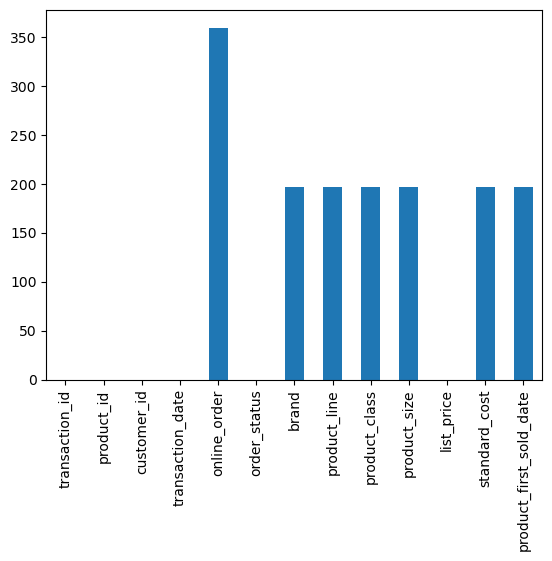

In [6]:
#visualize the missing values in the dataset
transactions_df.isna().sum().plot(kind='bar')

In [7]:
#handling missing values 
#first using the rule of 5 to drop missing values

threshold = len(transactions_df) * 0.05
print('threshold_value :',threshold)

cols_to_drop = transactions_df.columns[transactions_df.isna().sum() <= threshold]
print('\n', cols_to_drop)

transactions_df.dropna(subset=cols_to_drop, inplace=True)

threshold_value : 1000.0

 Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')


In [8]:
#checking data info
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [9]:
#viewing the unique values of each columns
cols = transactions_df.columns

for c in cols:
    print(c)
    print(transactions_df[c].unique())
    print('\n')
    

transaction_id
[    1     2     3 ... 19998 19999 20000]


product_id
[  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  95  18  70  26  39  36  98  75  42  20  24  53  65
  29  11  10   7  41   9  69  97 100  74  90  71  34  57  23  51  59  63
  40   8  13  30  48  49  68  83  43  52  85]


customer_id
[2950 3120  402 ... 3446 2764 3168]


transaction_date
['2017-02-25T00:00:00.000000000' '2017-05-21T00:00:00.000000000'
 '2017-10-16T00:00:00.000000000' '2017-08-31T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-03-08T00:00:00.000000000'
 '2017-04-21T00:00:00.000000000' '2017-07-15T00:00:00.000000000'
 '2017-08-10T00:00:00.000000000' '2017-08-30T00:00:00.000000000'
 '2017-01-17T00:00:00.000000000' '2017-01-05T00:00:00.000000000'
 '2017-02-26T00:00:00.000000000' '2017-09-10T00:00:00.000000

In [10]:
#reading in the customer_demographic sheet
cust_dt = pd.read_excel('Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3,header=1)
cust_dt.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15448\3835698452.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_dt = pd.read_excel('Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3,header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
#checking the shape 
cust_dt.shape

(4000, 13)

In [12]:
#checking for missing values
cust_dt.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

<AxesSubplot:>

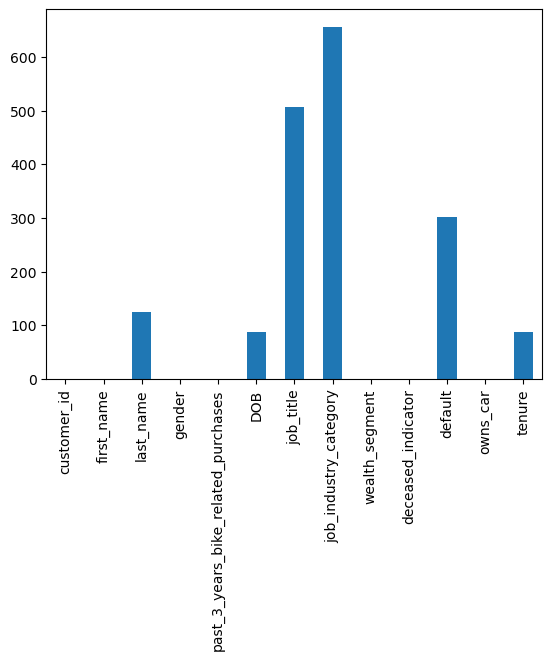

In [13]:
#visualize the missing values
cust_dt.isna().sum().plot(kind='bar')

In [14]:
#handling missing values 
#first using the rule of 5 to drop missing values

threshold = len(cust_dt) * 0.05
print('threshold_value :',threshold)

cols_to_drop = cust_dt.columns[cust_dt.isna().sum() <= threshold]
print('\n', cols_to_drop)

cust_dt.dropna(subset=cols_to_drop, inplace=True)

threshold_value : 200.0

 Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')


In [15]:
#checking info 
cust_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3792 non-null   int64         
 1   first_name                           3792 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3792 non-null   object        
 4   past_3_years_bike_related_purchases  3792 non-null   int64         
 5   DOB                                  3792 non-null   datetime64[ns]
 6   job_title                            3311 non-null   object        
 7   job_industry_category                3161 non-null   object        
 8   wealth_segment                       3792 non-null   object        
 9   deceased_indicator                   3792 non-null   object        
 10  default     

In [16]:
#checking for duplicates
cust_dt['customer_id'].duplicated().sum()

0

In [17]:
#viewimg the unique values of the columns
cols = cust_dt.columns

for c in cols:
    print(c)
    print(cust_dt[c].unique())
    print('\n')
    

customer_id
[   1    2    3 ... 3996 3997 4000]


first_name
['Laraine' 'Eli' 'Arlin' ... 'Rolph' 'Stephie' 'Rusty']


last_name
['Medendorp' 'Bockman' 'Dearle' ... 'Iapico' 'Halgarth' 'Oldland']


gender
['F' 'Male' 'Female' 'U' 'Femal' 'M']


past_3_years_bike_related_purchases
[93 81 61 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37  5
 62 18  3 17 44 59 40 33 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 16 78 30 94 28 20 11  1 75 41 69 67 19 80 83 25  4 23 65 88 10 77  9 82
 27 53 32 34 36 90 54 95 39  7 42 13 45 71 50 14 89 84 96 70 66  0 15 86
 92  8 29 52]


DOB
['1953-10-12T00:00:00.000000000' '1980-12-16T00:00:00.000000000'
 '1954-01-20T00:00:00.000000000' ... '1975-12-12T00:00:00.000000000'
 '2001-07-13T00:00:00.000000000' '1991-11-05T00:00:00.000000000']


job_title
['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'Senior Editor' nan 'Media Manager I'
 'Business Systems Development Analyst' 'Senior Quality Engineer'
 'Nuclear Power Engin

In [18]:
#cleaning inconsistent values in the gender columns using replace()
cust_dt['gender'] = cust_dt['gender'].replace({'F':'Female','Femal':'Female','M':'Male','U':'Unknown'})

In [19]:
#createing a age column from the dataof birth column
date.today().year

cust_dt['age'] = date.today().year - cust_dt['DOB'].dt.year 
#subsetting outlier
outlier_cust_dt = cust_dt[cust_dt.loc[: , 'age'] > 100]
outlier_cust_dt

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
33,34,Jephthah,Bachmann,Unknown,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,180


In [20]:
#cleaned dataframe
cl_cust_dt = cust_dt[cust_dt.loc[: , 'age'] <= 100]
cl_cust_dt.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,46
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,57


In [21]:
#reading the customer address sheet
cust_address = pd.read_excel('Downloads/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4,header=1)
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [22]:
#checking for missing values
cust_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [23]:
#checking data info
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [24]:
#checking for duplicates
cust_address['customer_id'].duplicated().sum()

0

In [25]:
#data shape
cust_address.shape

(3999, 6)

In [26]:
#viewing the unique values of each columns
cols = cust_address.columns

for c in cols:
    print(c)
    print(cust_address[c].unique())
    print('\n')

customer_id
[   1    2    4 ... 4001 4002 4003]


address
['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']


postcode
[2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263 2154 2119 3016 4113 2032 4352 3020 2116 3057 2099 3749
 2148 3145 2021 2333 2783 2280 4120 3638 2074 2880 2430 4560 2088 2220
 3031 2250 2261 3

In [27]:
#cleaning inconsistent data with replace()
cust_address['state'] = cust_address['state'].replace('NSW','New South Wales')

## Data cleaning Summary

Dear Sprocket central Pty ltd ,

I would like to express my gratitude for providing us with the three datasets from Sprocket Central Pty Ltd. I have compiled a summary of the statistics from the received datasets for your review. Kindly let me know if there are any discrepancies with your understanding.

During the data analysis process, we encountered certain data quality issues that required mitigation to ensure the accuracy and consistency of the underlying data used for business decisions. Here are the notable issues and the methods we employed to address them:

1.There were additional customer_ids in the 'Transactions table' and 'Customer Address table' but not in 'Customer Master (Customer Demographic)':
  Mitigation: We recommend ensuring that all tables are from the same period, and only customers present in the Customer Master list should be used as a training set for our model. This step will prevent any data inconsistencies and ensure the integrity of the analysis results.

2.Various columns, such as the brand of a purchase , product_class, job title etc , contain empty values in certain records:
  Mitigation: If only a small number of rows have empty values, we suggest filtering out those records entirely from the training set for prediction. However, if it is a core field, imputation can be done based on the distribution in the training dataset. We have removed less than 1% of transactions (totaling less than 0.1% of revenue) with missing fields from the training dataset.

3.Inconsistent values for the same attribute (e.g., Female represented as "F", "Femal", and Male represented as 'm'):
 Mitigation: We utilized regular expressions to replace extended values with abbreviations to ensure consistency across addresses. We recommend enforcing a drop-down list for users entering data instead of a free text field to maintain uniformity.

4.Inconsistent data types for the same attribute (e.g., numeric values for some fields and strings for others):
 Mitigation: Selected records in characters were converted to numeric values, and non-numeric characters were removed from strings. To ensure consistent interpretation of results, we recommend having constraints on data types for fact tables in the given database.

The data has undergone cleaning, standardization, and transformation processes to create meaningful variables for the model analysis. Gender records with 'U' have been replaced based on the distribution from the training dataset.

Moving forward, we will continue with the data analysis process, and any questions or assumptions raised during the process will be documented. It would be immensely helpful to collaborate with your data SME to ensure that all assumptions align with Sprocket Central's understanding.

Thank you for the opportunity to work on this Market Basket Analysis Project. I am enthusiastic about contributing my data analysis skills to uncover valuable insights into customer purchasing behaviors.

Kind regards,
faey

In [28]:
#merge all three dataframe into one
pd.set_option('display.max_columns',31)
merged_df = cl_cust_dt.merge(cust_address,on='customer_id').merge(transactions_df, on='customer_id')
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70,060 Morning Avenue,2016,New South Wales,Australia,10,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70,060 Morning Avenue,2016,New South Wales,Australia,10,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70,060 Morning Avenue,2016,New South Wales,Australia,10,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70,060 Morning Avenue,2016,New South Wales,Australia,10,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70,060 Morning Avenue,2016,New South Wales,Australia,10,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [29]:
#checking the new data shape
merged_df.shape

(18368, 31)

In [30]:
#dropping the default column
merged_df.drop('default', axis=1, inplace=True)

In [31]:
#randomly sampling 10 rows
merged_df.sample(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
15255,2880,Ingra,Kelby,Male,43,1967-11-15,Legal Assistant,Health,Mass Customer,N,No,7.0,56,8647 La Follette Court,2067,New South Wales,Australia,9,18314,26,2017-03-25,1.0,Approved,WeareA2B,Standard,medium,medium,1992.93,762.63,34115.0
17250,3272,Bar,Frankcom,Male,75,1993-06-04,Payment Adjustment Coordinator,NaN,Affluent Customer,N,No,9.0,30,1 Toban Crossing,3616,VIC,Australia,3,15436,95,2017-03-10,1.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0
12879,2445,Johnnie,Prujean,Male,46,1976-03-11,Quality Control Specialist,Retail,Affluent Customer,N,No,18.0,47,8147 Dapin Hill,2280,New South Wales,Australia,8,14013,32,2017-05-26,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,37337.0
10108,1908,Jaquelyn,Workman,Female,2,1963-12-10,Help Desk Technician,Financial Services,High Net Worth,N,Yes,6.0,60,5766 Pearson Court,2227,New South Wales,Australia,8,17807,21,2017-06-29,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,42560.0
9430,1785,Marty,Whatford,Male,23,1960-12-10,Clinical Specialist,Health,Mass Customer,N,No,19.0,63,30 Delladonna Plaza,3046,VIC,Australia,8,6191,50,2017-06-12,0.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668.0
8164,1545,Carver,Saturley,Male,34,1977-09-06,Associate Professor,Health,Mass Customer,N,Yes,15.0,46,8595 Ruskin Plaza,3196,VIC,Australia,10,1561,46,2017-12-28,1.0,Approved,Solex,Standard,low,medium,1289.85,74.51,37220.0
3670,683,Brennan,Gagen,Male,60,1962-05-16,NaN,Manufacturing,Mass Customer,N,Yes,10.0,61,40545 Forster Point,2262,New South Wales,Australia,7,12445,14,2017-01-21,0.0,Approved,Trek Bicycles,Standard,medium,small,1386.84,1234.29,34165.0
261,50,Whitby,Schapero,Male,38,1980-10-01,Account Executive,Manufacturing,Mass Customer,N,Yes,16.0,43,957 Veith Junction,2047,New South Wales,Australia,10,17709,50,2017-01-17,0.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,41009.0
9823,1854,Mandie,Jeger,Female,11,1978-09-12,Community Outreach Specialist,NaN,High Net Worth,N,Yes,17.0,45,48023 International Way,3630,VIC,Australia,1,8004,2,2017-07-20,1.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,38647.0
9374,1774,Vidovik,Astall,Male,48,1978-11-01,Compensation Analyst,Financial Services,Mass Customer,N,Yes,18.0,45,6 Hansons Park,2145,New South Wales,Australia,7,7017,6,2017-09-24,1.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,40649.0
